In [1]:
import torch

from seq2seq.dataset import Dataset
from seq2seq.model import Seq2seqModel
from seq2seq.trainer import Trainer, Evaluator
from seq2seq.utils.Visualization import vizAttn, vizAccumAttn

In [2]:
USE_CUDA = torch.cuda.is_available()
GPU_ID = 1
USE_CUDA

True

# 1. Preprocess Data

In [3]:
SRC_FILE_PATH = 'toy_data/toy_src_data.txt'
TGT_FILE_PATH = 'toy_data/toy_tgt_data.txt'

EXPR_PATH = 'toy_data/'

BATCH_SIZE = 32
MAX_SRC_LEN = 10
MAX_TGT_LEN = 10

In [4]:
dataset = Dataset(
    src_file_path=SRC_FILE_PATH,
    tgt_file_path=TGT_FILE_PATH,
    max_src_len=MAX_SRC_LEN,
    max_tgt_len=MAX_TGT_LEN
)

Reading lines...
Read 1000 sentence pairs

Trim data to 1000 sentence pairs
Avg length of src :  5.441
Avg length of tgt :  5.441

Source vocab : 54 (0 reduced)
Target vocab : 54 (0 reduced)

Success to preprocess data!



# 2. Define Model

In [5]:
INPUT_SIZE = dataset.src_vocab_size
EMBED_SIZE = 64
HIDDEN_SIZE = 64
OUTPUT_SIZE = dataset.tgt_vocab_size

In [6]:
model = Seq2seqModel(
    name='test_model',
    input_size=INPUT_SIZE,
    emb_size=EMBED_SIZE,
    hidden_size=HIDDEN_SIZE,
    output_size=OUTPUT_SIZE,
    max_src_len=MAX_SRC_LEN,
    max_tgt_len=MAX_TGT_LEN,
    dropout_p=0.2,
    bidirectional=True,
    use_attention=True,
    gpu_id=GPU_ID
)

# 3. Train Model

In [7]:
trainer = Trainer(model, dataset, gpu_id=GPU_ID, print_interval=1, plot_interval=1, checkpoint_interval=10, expr_path=EXPR_PATH)

Start to train
epoch:  1 ( 10%) time:     0m 1s (-     0m 11s) loss:109.5130
epoch:  2 ( 20%) time:     0m 2s (-      0m 9s) loss:95.6849
epoch:  3 ( 30%) time:     0m 3s (-      0m 8s) loss:74.0337
epoch:  4 ( 40%) time:     0m 4s (-      0m 7s) loss:43.1903
epoch:  5 ( 50%) time:     0m 5s (-      0m 5s) loss:20.1874
epoch:  6 ( 60%) time:     0m 7s (-      0m 4s) loss:10.7843
epoch:  7 ( 70%) time:     0m 8s (-      0m 3s) loss:6.1625
epoch:  8 ( 80%) time:     0m 9s (-      0m 2s) loss:4.3003
epoch:  9 ( 90%) time:    0m 10s (-      0m 1s) loss:2.7345
epoch: 10 (100%) time:    0m 11s (-      0m 0s) loss:2.0870


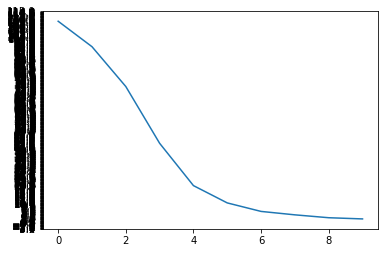

In [8]:
trainer.train(num_epoch=10, batch_size=BATCH_SIZE)

# 4. Evaluate Model

In [9]:
evaluator = Evaluator(dataset, model)
evaluator.loadModel(EXPR_PATH+'test_model10.model')

Input : 30 5 17 39 18 20 2
Gen   : 2 20 18 39 17 5 30 <EOS>


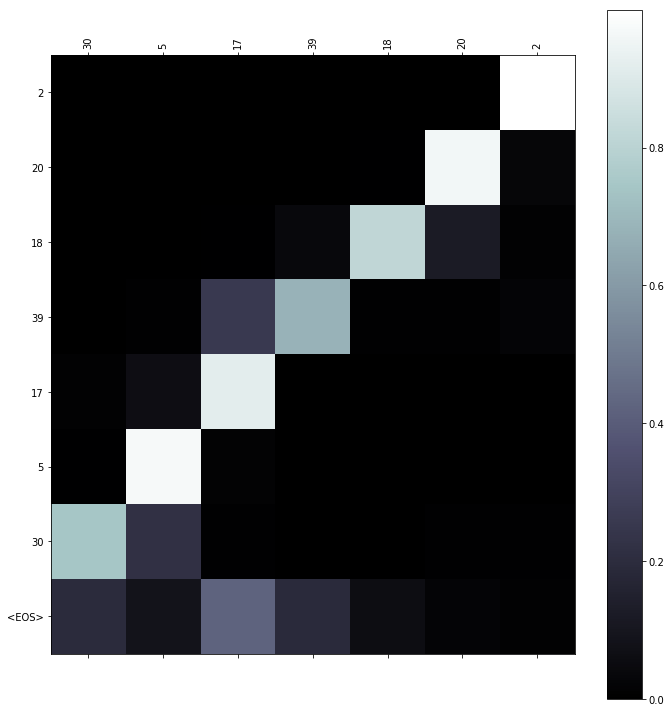


Input : 21 2 40 21 35 34 26 46 39 13
Gen   : 13 39 46 26 34 35 <EOS>


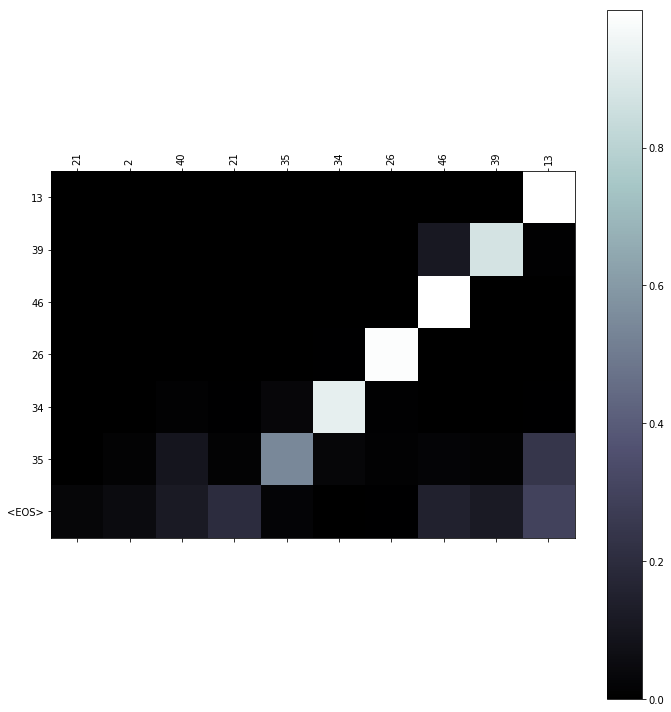


Input : 50 3 26
Gen   : 26 3 50 50 <EOS>


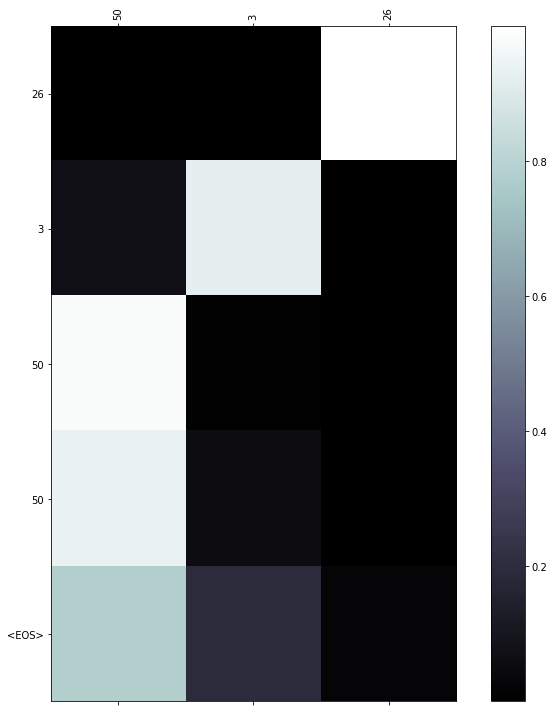

In [10]:
pairs, attn_list = evaluator.evalModel(num=3, beam_size=5)
for p, attn in zip(pairs, attn_list):
    print('Input : ' + ' '.join(p[0]))
    print('Gen   : ' + ' '.join(p[1]))
    vizAttn(p[0], p[1], attn)
    print()